In [1]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).""")

This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [3]:
fname = "../data/zhang_prl_direct_model_fidsus_curve_data_2024-05-10_15-48-25.csv"
cols = ["lam", "beta", "H1", "H1_std", "int1", "int1_std", "int2", "int2_std", "int3", "int3_std", "rng", "Tsteps", "steps", "stepsPerMeasurement", "sign", "sign_std", "q", "qmax", "time"]
df = pd.read_csv(fname, names=cols, skiprows=1)
# add fid sus column
df['fidsus'] = (df.int3 - (df.beta*df.H1)**2/8)
# add energy suscepibility column
df['chiE'] = (df.int1 - df.beta*(df.H1)**2)
# add int2 suscepibility column
df['chiX'] = df.int2 - (df.beta*df.H1)**2/2
df.head()

,lam,beta,H1,H1_std,int1,int1_std,int2,int2_std,int3,int3_std,...,steps,stepsPerMeasurement,sign,sign_std,q,qmax,time,fidsus,chiE,chiX
2,-1.500000,5.0,1.93906,0.001226,19.160524,0.014804,47.901310,0.037010,11.945556,0.009655,...,1000000,10,1,0,0.19148,6,15.18,0.195701,0.360756,0.901889
2,-1.484925,5.0,1.93172,0.001358,19.079049,0.016330,47.697624,0.040825,11.893264,0.010643,...,1000000,10,1,0,0.19750,6,15.34,0.232195,0.421339,1.053347
2,-1.469849,5.0,1.92744,0.001385,19.026139,0.016747,47.565347,0.041868,11.858640,0.010925,...,1000000,10,1,0,0.20184,6,15.38,0.249187,0.451014,1.127535
2,-1.454774,5.0,1.91808,0.001488,18.922160,0.017671,47.305399,0.044177,11.792011,0.011500,...,1000000,10,1,0,0.20762,6,15.41,0.295039,0.527005,1.317513
2,-1.439698,5.0,1.91200,0.001629,18.852057,0.019861,47.130142,0.049653,11.746600,0.012958,...,1000000,10,1,0,0.21140,6,15.42,0.322401,0.573337,1.433342


In [4]:
# compute exact values of observables at T = 0
lam_pts = np.sort(np.unique(df.lam))
gs_beta_vals = [r"$\infty$" for _ in lam_pts]
gs_chiE_vals = [prl_gs_chiE(lam)[0] for lam in lam_pts]
gs_fidsus_vals1 = [prl_gs_chiF(lam)[0] for lam in lam_pts]
gs_fidsus_vals2 = [prl_gs_fidsus(lam) for lam in lam_pts]
gs_exact_dict = {"lam": lam_pts, "beta": gs_beta_vals, "chiE": gs_chiE_vals,
                 "fidsus": gs_fidsus_vals1, "fidsus2": gs_fidsus_vals2}
gs_exact_df = pd.DataFrame(gs_exact_dict)

In [5]:
gs_exact_df.head()

,lam,beta,chiE,fidsus,fidsus2
0,-1.500000,$\infty$,0.144247,0.069657,0.069683
1,-1.484925,$\infty$,0.157080,0.078039,0.078069
2,-1.469849,$\infty$,0.171443,0.087696,0.087730
3,-1.454774,$\infty$,0.187566,0.098860,0.098900
4,-1.439698,$\infty$,0.205719,0.111818,0.111865


In [6]:
# compute exact values of observables at finite beta
lam_pts = np.sort(np.unique(df.lam))
beta_lam_vals = []
beta_beta_vals = []
beta_chiE_vals = []
beta_fidsus_vals = []
for beta in np.unique(df.beta):
    beta_lam_vals.extend([lam for lam in lam_pts])
    beta_beta_vals.extend([beta for _ in lam_pts])
    beta_chiE_vals.extend([prl_beta_chiE(lam, beta)[0] for lam in lam_pts])
    beta_fidsus_vals.extend([prl_beta_chiF(lam, beta)[0] for lam in lam_pts])
beta_exact_dict = {"lam": beta_lam_vals, "beta": beta_beta_vals, "chiE": beta_chiE_vals,
                 "fidsus": beta_fidsus_vals}
beta_exact_df = pd.DataFrame(beta_exact_dict)

In [7]:
beta_exact_df.head()

,lam,beta,chiE,fidsus
0,-1.500000,5.0,0.358844,0.194560
1,-1.484925,5.0,0.403502,0.221014
2,-1.469849,5.0,0.454050,0.251072
3,-1.454774,5.0,0.511203,0.285180
4,-1.439698,5.0,0.575735,0.323818


# Primary plot

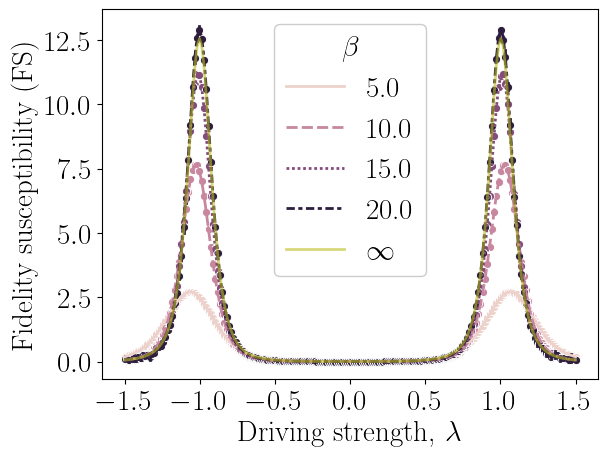

In [9]:
lineplot = sns.lineplot(x="lam", y="fidsus", hue="beta", data=df, marker='o', linestyle='', err_style='bars', markersize=6, legend=False)
lineplot = sns.lineplot(x="lam", y="fidsus", hue="beta", style="beta", data=beta_exact_df)
lineplot = sns.lineplot(x="lam", y="fidsus", data=gs_exact_df, alpha=0.6, label=r"$\infty$")
lineplot.set_xticks([-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5])
lineplot.legend_.set_title(r"$\beta$")
lineplot.set_xlabel(r"Driving strength, $\lambda$")
lineplot.set_ylabel(r"Fidelity susceptibility (FS)")
fig = lineplot.get_figure()
fig.savefig("figures/fig1_direct_fidsus_plot.pdf", dpi=800, bbox_inches="tight")